# Refractive Indices of Glasses

**Scott Prahl**

**Sept 2023**

The interface is a bit weird.  Basically, you need to get the Sellmeier coefficients for the type of glass that you want.  Fortunately, this module has a bunch of glasses entered already.  The list is named `ALL_GLASS_NAMES`.

In [1]:
# Jupyterlite support for ofiber
try:
    import micropip
    await micropip.install("ofiber")
except ModuleNotFoundError:
    pass

import matplotlib.pyplot as plt
import numpy as np
import ofiber

%config InlineBackend.figure_format='retina'

In [2]:
print(ofiber.ALL_GLASS_NAMES)

['SiO2' 'GeO2' '9.1% P2O2' '13.3% B2O3' '1.0% F' '16.9% Na2O : 32.5% B2O3'
 'ABCY' 'HBL' 'ZBG' 'ZBLA' 'ZBLAN' '5.2% B2O3' '10.5% P2O2' 'N-BK7'
 'fused silica' 'sapphire (ordinary)' 'sapphire (extraordinary)'
 'MgF2 (ordinary)' 'MgF2 (extraordinary)' 'CaF2' 'F2' 'F5' 'FK5HTi' 'K10'
 'K7' 'LAFN7' 'LASF35' 'LF5' 'LF5HTi' 'LLF1' 'LLF1HT' 'N-BAF1' 'N-BAF4'
 'N-BAF5' 'N-BAF5' 'N-BAK1' 'N-BAK2' 'N-BAK4' 'N-BALF' 'N-BALF' 'N-BASF'
 'N-BASF' 'N-BK10' 'N-F2' 'N-FK5' 'N-FK51' 'N-FK58' 'N-K5' 'N-KF9'
 'N-KZFS' 'N-KZFS' 'N-KZFS' 'N-KZFS' 'N-KZFS' 'N-LAF2' 'N-LAF2' 'N-LAF3'
 'N-LAF3' 'N-LAF3' 'N-LAF7' 'N-LAK1' 'N-LAK1' 'N-LAK1' 'N-LAK2' 'N-LAK2'
 'N-LAK3' 'N-LAK3' 'N-LAK7' 'N-LAK8' 'N-LAK9' 'N-LASF' 'N-LASF' 'N-LASF'
 'N-LASF' 'N-LASF' 'N-LASF' 'N-LASF' 'N-LASF' 'N-LASF' 'N-PK51' 'N-PK52'
 'N-PSK3' 'N-PSK5' 'N-SF1' 'N-SF10' 'N-SF11' 'N-SF14' 'N-SF15' 'N-SF2'
 'N-SF4' 'N-SF5' 'N-SF57' 'N-SF6' 'N-SF66' 'N-SF6H' 'N-SF8' 'N-SK11'
 'N-SK14' 'N-SK16' 'N-SK2' 'N-SK4' 'N-SK5' 'N-SSK2' 'N-SSK5' 'N-SSK8'
 'N-

You can just count to find the glass you want.  Standard silicon dioxide SiO₂ has number 0.  Germanium dioxide GeO₂ has number 1.

Alternatively you can search for the glass you want.  The number of BK7 is 13.

In [3]:
ofiber.find_glass("BK7")

13

So `ofiber.glass(13)` will return the coefficients for BK7 glass for example.  The function `ofiber.n(glass,λ)` returns the index of refraction at a particular (vacuum) wavelength $\lambda_0$.

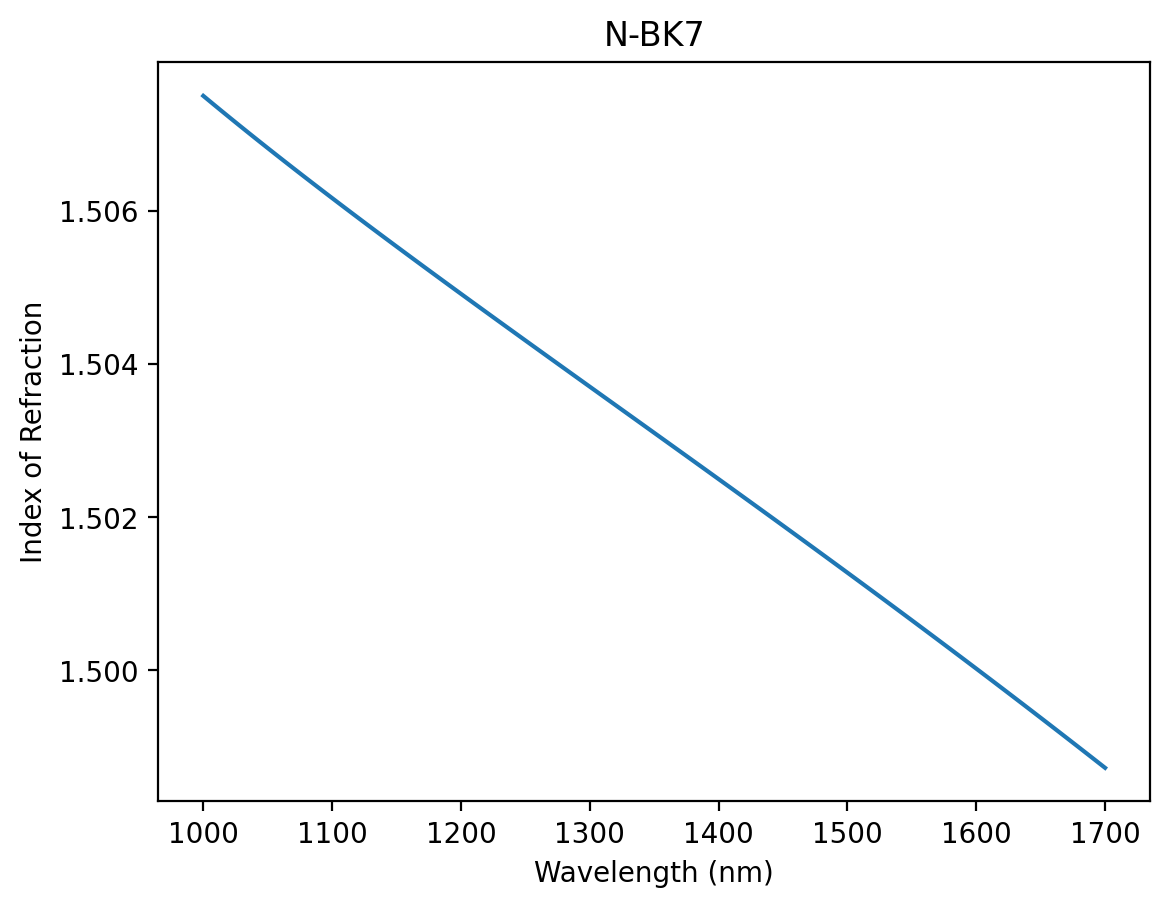

In [4]:
glass_coefficients = ofiber.glass(13)
name = ofiber.glass_name(13)
λ = np.linspace(1000,1700,100)*1e-9
n = ofiber.n(glass_coefficients,λ)
plt.plot(λ*1e9,n)
plt.title(name)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Index of Refraction')
plt.show()

## SiO₂ and GeO₂ fibers

These are the mainstay of the optical fiber industry.  By doping SiO₂ with GeO₂ different refractive index profiles can be achieved.  This plot shows the limits of 100% of each material.  They look pretty similar, just displaced by 0.14 index units.

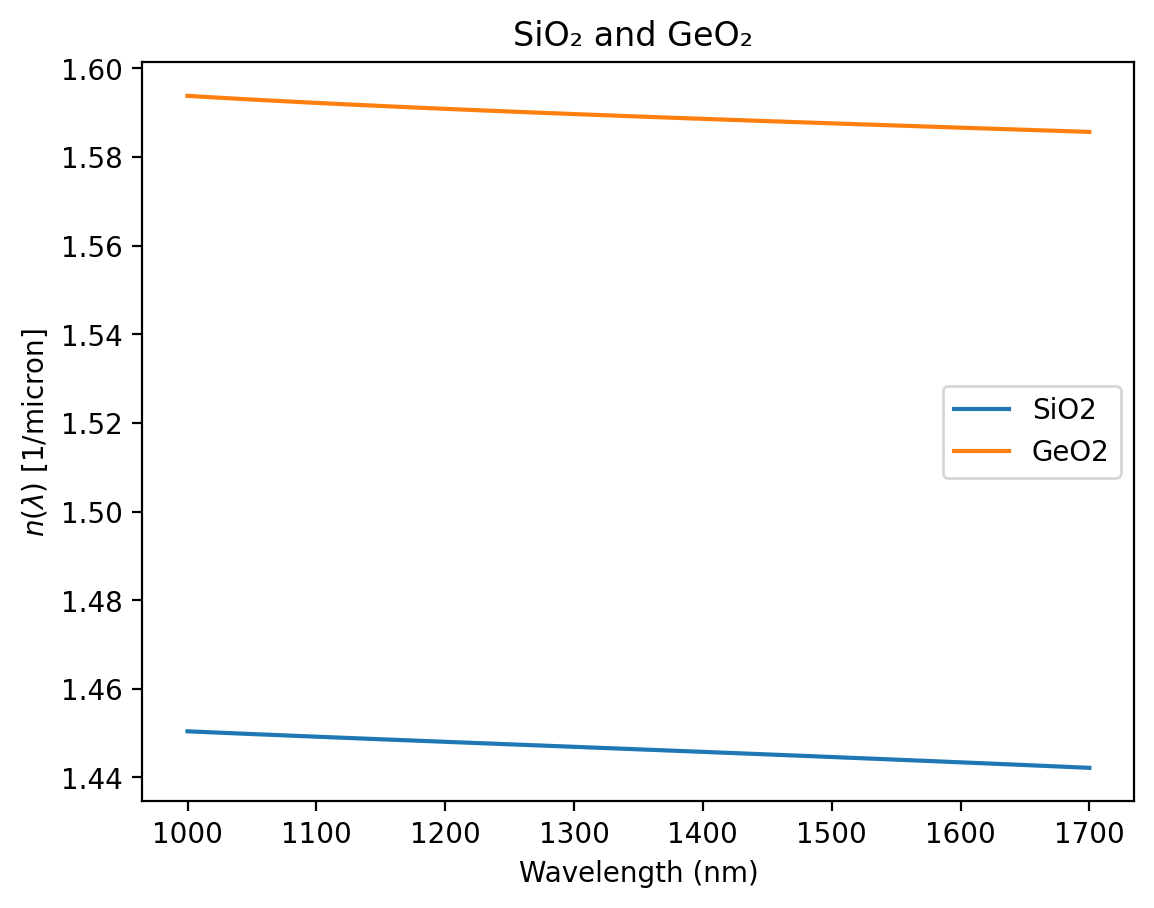

In [5]:
glass = ofiber.glass(0)
name = ofiber.glass_name(0)
λ = np.linspace(1000,1700,100)*1e-9
n = ofiber.n(glass,λ)
plt.plot(λ*1e9,n,label=name)

glass = ofiber.glass(1)
name = ofiber.glass_name(1)
λ = np.linspace(1000,1700,100)*1e-9
n = ofiber.n(glass,λ)
plt.plot(λ*1e9,n,label=name)

plt.title("SiO₂ and GeO₂ ")
plt.xlabel('Wavelength (nm)')
plt.ylabel('$n(\lambda)$ [1/micron]')
plt.legend()
plt.show()

However, if you plot the first derivative, interesting things appear.  Notice the weird units on the vertical axis.

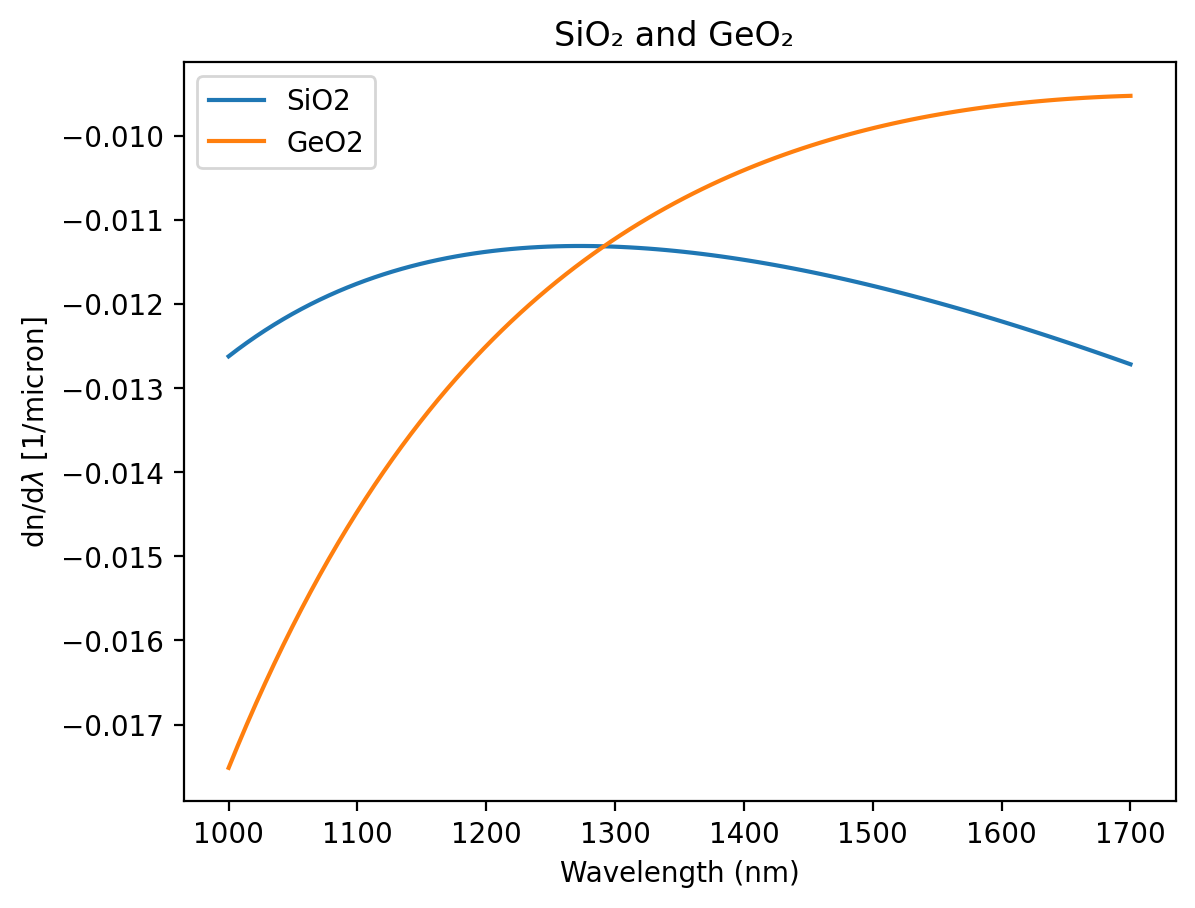

In [6]:
glass = ofiber.glass(0)
name = ofiber.glass_name(0)
λ = np.linspace(1000,1700,100)*1e-9
dn = ofiber.dn(glass,λ)
plt.plot(λ*1e9,dn*1e-6,label=name)

glass = ofiber.glass(1)
name = ofiber.glass_name(1)
λ = np.linspace(1000,1700,100)*1e-9
dn = ofiber.dn(glass,λ)
plt.plot(λ*1e9,dn*1e-6,label=name)

plt.title("SiO₂ and GeO₂ ")
plt.xlabel('Wavelength (nm)')
plt.ylabel('dn/d$\lambda$ [1/micron]')
plt.legend()
plt.show()

## SiO₂ doped with GeO₂ 

Since doping of SiO₂ with GeO₂ is common there is a special routine to generate Sellmeier coefficients for glass doped with a specific fraction $x$ of GeO₂.  The interface is simple.

In [7]:
help(ofiber.doped_glass)

Help on function doped_glass in module ofiber.refraction:

doped_glass(x)
    Calculate Sellmeier coefficients for SiO_2 doped with GeO_2.
    
    The idea is that the glass a combination of silicon dioxide or
    germanium dioxide where x is the molar fraction of GeO_2. Thus
    (1-x) is the molar fraction of SiO_2.  The overall composition is
    x * GeO_2 : (1 - x) * SiO_2.
    
    Args:
        x: fraction of GeO_2 (0<=x<=1)
    Returns:
        Sellmeier coefficients for doped glass (array of six values)



Here the second derivative of the refractive index is plotted for 100% SiO₂, 100% GeO₂, and 10% GeO₂

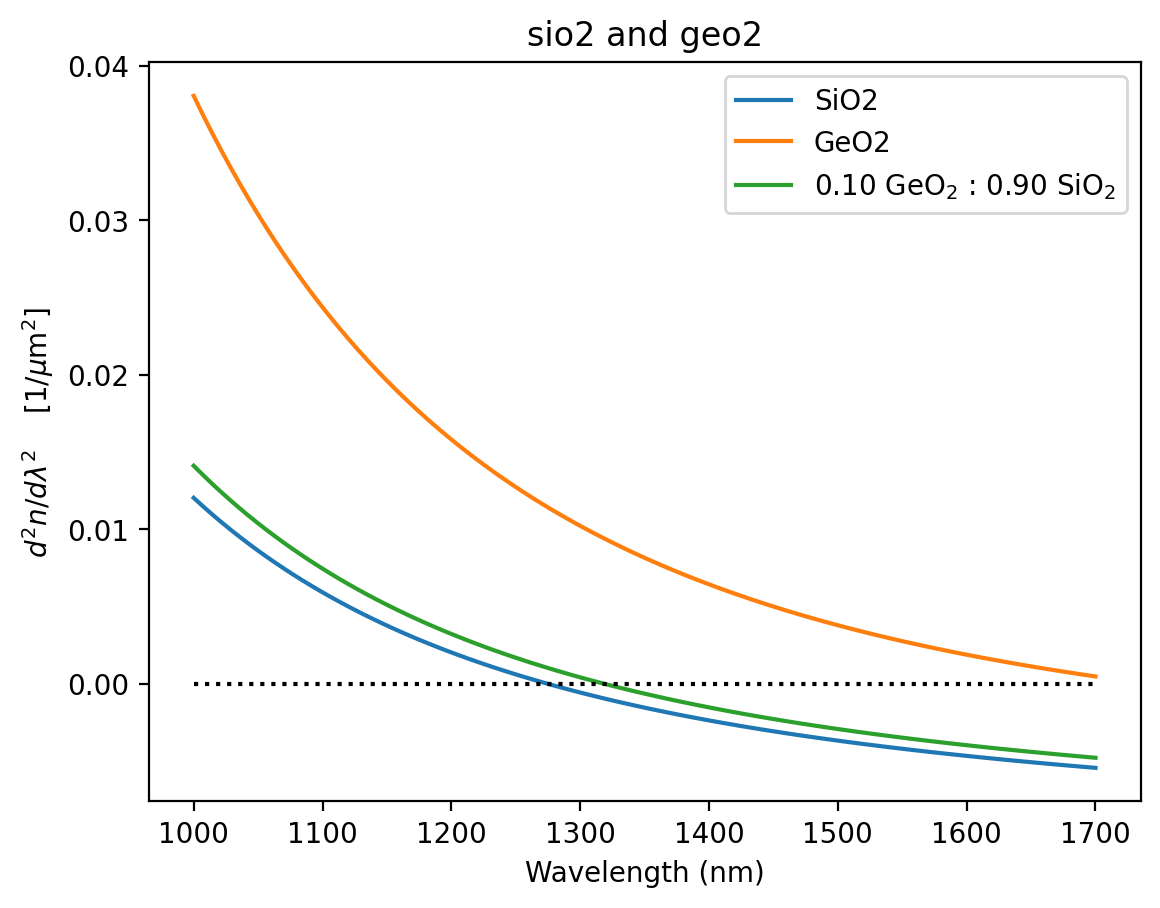

In [8]:
glass = ofiber.glass(0)
name = ofiber.glass_name(0)
λ = np.linspace(1000,1700,100)*1e-9
d2n = ofiber.d2n(glass,λ)
plt.plot(λ*1e9,d2n*1e-12,label=name)

glass = ofiber.glass(1)
name = ofiber.glass_name(1)
λ = np.linspace(1000,1700,100)*1e-9
d2n = ofiber.d2n(glass,λ)
plt.plot(λ*1e9,d2n*1e-12,label=name)

glass = ofiber.doped_glass(0.10)
name = ofiber.doped_glass_name(0.1)
λ = np.linspace(1000,1700,100)*1e-9
d2n = ofiber.d2n(glass,λ)
plt.plot(λ*1e9,d2n*1e-12,label=name)

plt.plot([1000,1700],[0,0],':k')
plt.title("sio2 and geo2")
plt.xlabel('Wavelength (nm)')
plt.ylabel('$d^2n/d\lambda^2$    [1/$\mu$m$^2$]')
plt.legend()
plt.show()

If we just want the second derivative at a specific wavelength, that is simple too.  The only tricky part is converting from the default 1/m$^2$ to 1/µm$^2$

In [9]:
λ = 1550e-9
glass=ofiber.glass(0)
name=ofiber.glass_name(0)
disp = ofiber.d2n(glass,λ)
print('d^2n/dlambda^2 of %s at %.0f nm is %.4f/um**2'%(name,λ*1e9,disp*1e-12))

d^2n/dlambda^2 of SiO2 at 1550 nm is -0.0042/um**2


We can calculate use this to calculate the material, waveguide, and total dispersion for a fiber.  (These are available directly in the `ofiber.dispersion` module.  This is just an example.)

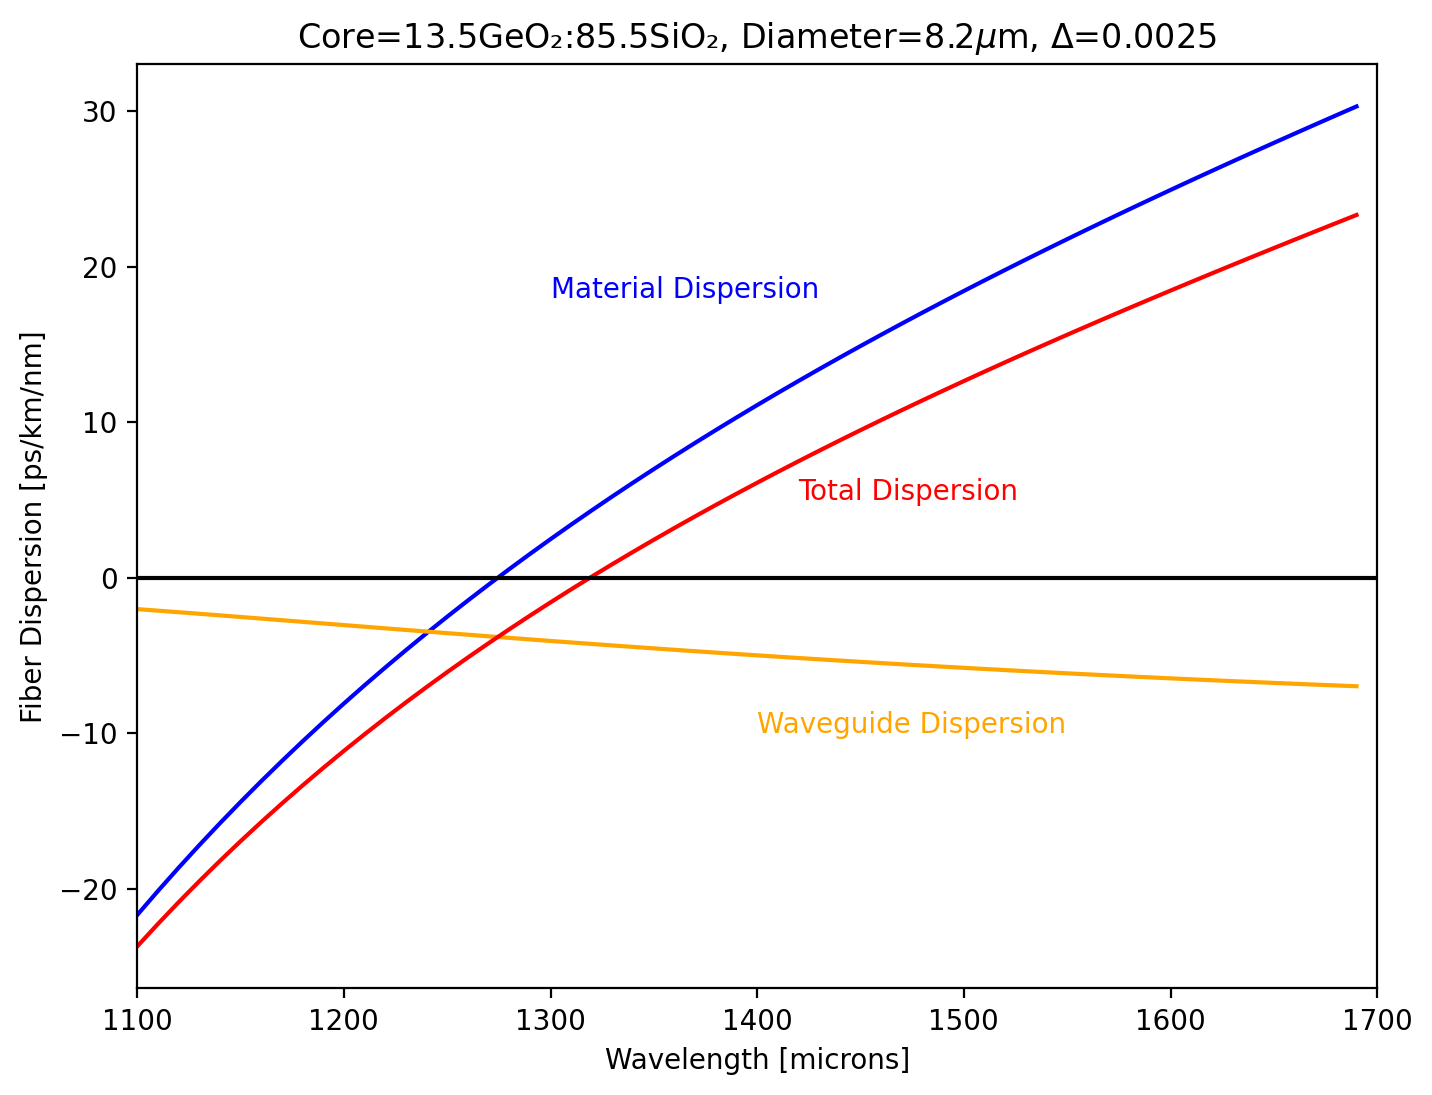

In [10]:
# Ghatak Section 3.A.1, page 85.  
#
c = 3e8      # [m/s] 

a = 4.1e-6          # [m] Fiber radius
delta = 0.0025      # Fractional change in the index of refraction

start = 1100
finish = 1700
resolution = 10

λ = np.arange(start,finish,resolution)*1e-9
npoints = len(λ)

glass=ofiber.glass(0)
n1 = ofiber.n(glass,λ)
d2n = ofiber.d2n(glass,λ)

V = (2*np.pi/λ)*a*n1*np.sqrt(2*delta) 

# Material Dispersion
M = -(λ/c)*d2n

# Waveguide dispersion
Dw = -n1*(1+delta)*delta/c/λ*(0.080+0.549*(2.834-V)**2)

ps_nm_km = 1e-12/1e-9/1e3
plt.subplots(1,1, figsize=(8,6))
plt.plot(λ*1e9,M/ps_nm_km,color='blue')

plt.plot(λ*1e9,Dw/ps_nm_km,color='orange')
plt.plot(λ*1e9,(M+Dw)/ps_nm_km,color='red')
plt.plot([1100,1700],[0,0],'k')
plt.xlabel('Wavelength [microns]')
plt.ylabel('Fiber Dispersion [ps/km/nm]')
plt.title('Core=13.5GeO₂:85.5SiO₂, Diameter=%.1f$\mu$m, Δ=%.4f'%(a*2e6,delta))
plt.xlim(1100,1700)
plt.annotate('Total Dispersion', xy=(1420,5),color='red')
plt.annotate('Material Dispersion', xy=(1300,18),color='blue')
plt.annotate('Waveguide Dispersion', xy=(1400,-10),color='orange')
plt.show()